In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

C:\Users\maxym\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
import math
from sklearn.impute import SimpleImputer
from  sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [3]:
print(len(df))

33538


In [4]:
df.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

In [5]:
for i in df.columns:
    print(i + ' ' +str(df[i][0]))
    print('')

id 22267382

name Modern and Cozy Large Studio in Brooklyn

summary Modern large studio with new amenities and appliances on the 40th floor in Brooklyn, 10 - 15 min from Manhattan by subway, all major subways close by, Fort Greene Park, BAM, Barclay Center, great restaurants. Washer/Dryer available in the unit. Gym available in the building at no additional cost

space Our place is a little quiet sanctuary in the heart of Fort Greene. Amazing views from the apartment and common area on the 41st floor. Looking for respectful guests, singles/couples, who'll treat this home as theirs. *The studio available is almost identical to the one in pics, but slightly smaller. The rest of the information is the same.That's why we are offering an additional discount.

description Modern large studio with new amenities and appliances on the 40th floor in Brooklyn, 10 - 15 min from Manhattan by subway, all major subways close by, Fort Greene Park, BAM, Barclay Center, great restaurants. Washer/Dryer a

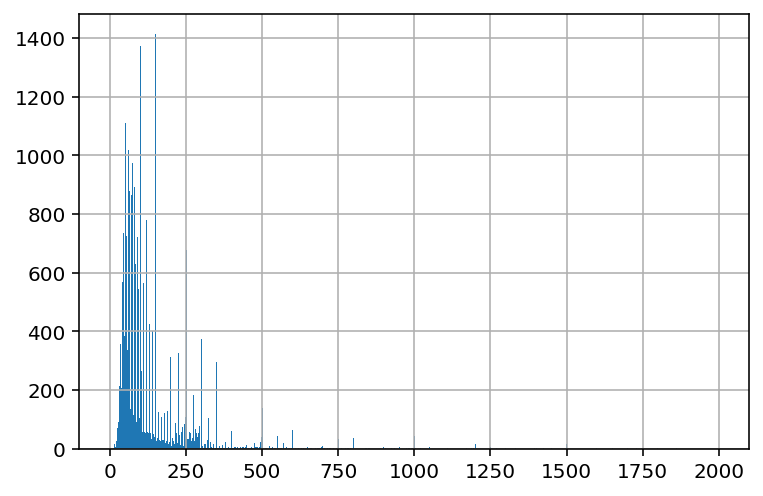

In [6]:
df['price'].hist(bins = 1000)

In [176]:
cnts =df.groupby('cancellation_policy').size().sort_values()
cnts

cancellation_policy
long_term                          1
strict                             1
super_strict_30                   34
super_strict_60                   81
moderate                        7746
flexible                       10345
strict_14_with_grace_period    15330
dtype: int64

In [177]:
means =df.groupby('cancellation_policy').mean()['price'].sort_values()
means

cancellation_policy
long_term                       95.000000
strict                          95.000000
flexible                       130.715901
moderate                       133.929770
strict_14_with_grace_period    159.158513
super_strict_30                279.882353
super_strict_60                366.345679
Name: price, dtype: float64

In [178]:
medians =df.groupby('cancellation_policy').median()['price'].sort_values()
medians

cancellation_policy
long_term                       95.0
strict                          95.0
flexible                        98.0
moderate                       100.0
strict_14_with_grace_period    120.0
super_strict_60                280.0
super_strict_30                294.0
Name: price, dtype: float64

In [10]:
q3 =df[['property_type','price']].groupby('property_type').quantile(.75)['price'].sort_values()
q1 = df[['property_type','price']].groupby('property_type').quantile(.75)['price'].sort_values()

In [11]:
mx =df[['property_type','price']].groupby('property_type').max()['price'].sort_values()
mn = df[['property_type','price']].groupby('property_type').min()['price'].sort_values()

In [183]:
out=[]
for i in means.index:
    out.append([i,cnts.loc[i],means.loc[i] + medians.loc[i]])
t = pd.DataFrame(out)

In [13]:
temp_df2 = pd.DataFrame(out).rename(columns = {0:'type',1:'count',2:'avg'})
temp_df2.sort_values('avg')

KeyError: 'avg'

In [14]:
temp_df1.sort_values('avg')

NameError: name 'temp_df1' is not defined

In [209]:
df['amenities'][0]

'{Wifi,"Air conditioning",Kitchen,Gym,Breakfast,Elevator,Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Building staff","Hot water","Luggage dropoff allowed"}'

In [16]:
counts = df.groupby('property_type').size().sort_values()

In [19]:
ttl = 0
for i in counts.index:
    if i in cheap:
        ttl += counts.loc[i]
ttl

298

In [20]:
ttl = 0
for i in counts.index:
    if i in l_middle:
        ttl += counts.loc[i]
ttl

1145

In [21]:
ttl = 0
for i in counts.index:
    if i in apart:
        ttl += counts.loc[i]
ttl

27060

In [22]:
ttl = 0
for i in counts.index:
    if i in u_middle:
        ttl += counts.loc[i]
ttl

2021

In [23]:
ttl = 0
for i in counts.index:
    if i in expensive:
        ttl += counts.loc[i]
ttl

543

In [93]:
counts = df[['zipcode','price']].groupby('zipcode').size().sort_values()

In [84]:
means = df[['zipcode','price']].groupby('zipcode').mean()['price'].sort_values()

In [105]:
medians = df[['zipcode','price']].groupby('zipcode').median()['price'].sort_values()
temp = []

for i in means.index:
    temp.append([i,means.loc[i] + medians.loc[i],counts.loc[i]])
temp_df = pd.DataFrame(temp).sort_values(1)
temp_df

,0,1,2
0,112208,60.000000,1
1,10472,64.000000,1
15,11370,65.857143,7
3,10458.0,70.250000,8
2,10302.0,80.000000,1
...,...,...,...
535,10312,775.000000,2
536,11461,798.000000,1
538,10007,840.000000,7
537,10282.0,1035.000000,2


In [147]:
temp = []
for i in temp_df.index:
    if i in list(set(temp_df[temp_df[1] >= bound1].index) & set(temp_df[temp_df[1] < bound2].index)):
        temp.append(True)
    else:
        temp.append(False)
temp_df[2].sum() /3

11017.666666666666

In [232]:
bound1 = 200
bound2 = 300
print(temp_df[temp_df[1] < bound1][2].sum())
temp = []
for i in temp_df.index:
    if i in list(set(temp_df[temp_df[1] >= bound1].index) & set(temp_df[temp_df[1] < bound2].index)):
        temp.append(True)
    else:
        temp.append(False)
print(temp_df[temp][2].sum())

print(temp_df[temp_df[1] >= bound2][2].sum())

9637
12246
11170


In [233]:
ch_zip = temp_df[temp_df[1] < bound1][0].tolist()
md_zip = temp_df[temp][0].tolist()
ex_zip = temp_df[temp_df[1] >= bound2][0].tolist()
t

,0,1,2
0,long_term,1,190.000000
1,strict,1,190.000000
2,flexible,10345,228.715901
3,moderate,7746,233.929770
4,strict_14_with_grace_period,15330,279.158513
5,super_strict_30,34,573.882353
6,super_strict_60,81,646.345679


In [234]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

def remove_percent(s):
    try:
        ret = int(s[:-1])
    except:
        ret = 0
    if isnan(ret):
        ret = 0
    return ret

def remove_dollar(s):
    try:
        ret = float(s[1:])
    except:
        ret = 93.46
    if isnan(ret):
        ret = 93.46
    return ret
        
categories = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
superhosts = [x for x in list(set(df['host_is_superhost'])) if type(x) is str]
room_types = [x for x in list(set(df['room_type'])) if type(x) is str]
bed_types = [x for x in list(set(df['bed_type'])) if type(x) is str]



print(len(categories))
print(len(superhosts))
print(len(room_types))
print(len(bed_types))

ch_can = ['long_term','strict','flexible','moderate']
ex_can = ['strict_14_with_grace_period','super_strict_30','super_strict_60']

expensive = ['Houseboat','Timeshare','Resort','Hotel','Aparthotel','Serviced apartment','Boat']
u_middle = ['Condominium','Tent','Boutique hotel','Other','Loft','Chalet']
house = ['House']
apart = ['Apartment']
l_middle = ['Townhouse','Guesthouse','Bungalow','Cottage']
cheap = ['Island','Casa particular (Cuba)','Villa','Hostel','Train','Tiny house','Camper/RV','Bed and breakfast','Guest suite','Cabin']

5
2
3
5


In [235]:
def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    review = to_float(row.review_scores_rating)
    
    one_hot = [int(row.neighbourhood_group_cleansed == category) for category in categories]
    superhost = [int(row.host_is_superhost == typ) for typ in superhosts]
    room_typ = [int(row.room_type == typ) for typ in room_types]
    bed_typ = [int(row.bed_type == typ) for typ in bed_types]
    
    host_list_count = to_int(row.host_listings_count)
    area = to_int(row.square_feet)
    
    if row.property_type in expensive:
        exp = 1
    else:
        exp = 0
    if row.property_type in u_middle:
        u_mid = 1
    else:
        u_mid = 0
    if row.property_type in l_middle:
        l_mid = 1
    else:
        l_mid = 0
    if row.property_type in cheap:
        ch = 1
    else:
        ch = 0
    if row.property_type in house:
        h = 1
    else:
        h = 0
    if row.property_type in apart:
        a = 1
    else:
        a = 0
    if row.zipcode in ch_zip:
        c_z = 1
    else:
        c_z = 0
    if row.zipcode in md_zip:
        m_z = 1
    else:
        m_z = 0
    if row.zipcode in ex_zip:
        e_z = 1
    else:
        e_z = 0
    if row.cancellation_policy in ch_can:
        c_c = 1
    else:
        c_c = 0
    if row.cancellation_policy in ex_can:
        e_c = 1
    else:
        e_c = 0
        
    wifi = 'TV' in row.amenities
    heating = 'Heating' in row.amenities
    work = 'Laptop' in row.amenities
    ess = 'Doorman' in row.amenities
    
    
    return [work, wifi,heating,ess,guest_num, guest_cap, bedrooms, bathrooms, review, host_list_count, area,exp,u_mid,l_mid,ch,h,a, c_z,m_z,e_z,c_c,e_c] + one_hot + superhost + room_typ + bed_typ

train_X, train_y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    train_X.append(feature)
    train_y.append(price)
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
print(len(train_X), len(train_y))

33538 33538


In [236]:
rfr = RandomForestRegressor(max_depth = 12)
rfr.fit(train_X, train_y)
preds= rfr.predict(train_X)
rmse = (mean_squared_error(train_y, preds)) ** (1/2)
test_y = rfr.predict(test_X)
print(rmse)

72.61402282498327


In [237]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('final.csv', index = False)

In [224]:
importances = list(rfr.feature_importances_)
importances

[0.015071484765793956,
 0.014072413133940307,
 0.013946887043499058,
 0.012063279760908591,
 0.010305165784609965,
 0.042018816810261664,
 0.0,
 0.09378441474291704,
 0.19988893540144195,
 0.04508536612331779,
 0.048192980868210736,
 0.00221371570679253,
 0.01904984598444141,
 0.012826000933514093,
 0.004715181507129038,
 0.00023488704295913284,
 0.004393141712114053,
 0.01119672952912174,
 0.016696473264190586,
 0.005324341440906323,
 0.08930998043109581,
 0.007460487719538526,
 0.007212248990524836,
 0.025978839521506206,
 0.0004957805015870655,
 0.0009578134839696934,
 0.005955712594762409,
 0.004005261724869854,
 0.005726591321027692,
 0.005992209667373312,
 0.26493152465549974,
 0.002730504442761393,
 0.0022429403151207686,
 0.0022074801157497517,
 9.913151981232845e-05,
 0.002363741452812678,
 0.0004603953859660948,
 0.0007892945999517492]

In [ ]:
dtr = DecisionTreeRegressor(max_depth = 6)
dtr.fit(train_X, train_y)
preds= dtr.predict(train_X)
rmse = (mean_squared_error(train_y, preds)) ** (1/2)
test_y = dtr.predict(test_X)
print(rmse)

In [20]:
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

test_y = rfc.predict(test_X)

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)
test_y = dtc.predict(test_X)

In [32]:
for i in range(10):
    dtr = DecisionTreeRegressor(max_depth = i+1)
    dtr.fit(train_X, train_y)
    preds= dtr.predict(train_X)
    rmse = (mean_squared_error(train_y, preds)) ** (1/2)
    test_y = dtr.predict(test_X)
    print(rmse)

121.72611206167102
113.0499902515135
108.76829712524712
105.9549937711422
103.16368304069739
101.4995411274876
99.92946428399597
98.50130687274773
97.32627259792993
96.3123650490165


101.51179248193526


In [173]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)

LinearRegression()

In [174]:
import pandas as pd

test_df = pd.read_csv('test.csv')

C:\Users\maxym\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [175]:
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = regr.predict(test_X)

In [176]:
print(len(test_y))

17337


In [44]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('final.csv', index = False)

In [178]:
import numpy as np

mean = np.mean(list(df['price']))

In [179]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = [mean for i in range(len(test_ids))]
output_df.to_csv('final.csv', index = False)

In [3]:
#Read in the training data frame
train_df = pd.read_csv('train.csv')
train_data = train_df.copy()
train_data.describe()

C:\Users\maxym\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,host_id,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.353800e+04,3.353800e+04,0.0,33533.000000,33538.000000,33478.000000,33505.000000,33507.000000,341.000000,33538.000000,...,33538.000000,25874.000000,25844.000000,25859.000000,25829.000000,25849.000000,25830.000000,25827.000000,33538.000000,26591.000000
mean,1.566316e+07,5.420691e+07,NaN,10.006799,2.856789,1.141376,1.176869,1.571313,738.958944,145.177291,...,21.635548,93.751488,9.599443,9.255153,9.737466,9.754304,9.500542,9.374647,3.956288,1.429904
std,8.788870e+06,6.149736e+07,NaN,85.869452,1.848491,0.425003,0.744365,1.054226,580.780447,133.085709,...,40.488277,8.315867,0.819684,1.073818,0.706306,0.688775,0.781516,0.888392,12.687366,1.672336
min,2.515000e+03,2.830000e+02,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,8.173466e+06,7.130984e+06,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,400.000000,69.000000,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.633786e+07,2.662292e+07,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,700.000000,109.000000,...,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.770000
75%,2.276632e+07,8.248502e+07,NaN,2.000000,4.000000,1.000000,1.000000,2.000000,1000.000000,175.000000,...,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.140000
max,2.977318e+07,2.240015e+08,NaN,2271.000000,16.000000,16.500000,10.000000,18.000000,5000.000000,1999.000000,...,557.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,19.890000


In [40]:
#Read in the training data frame
test_df = pd.read_csv('test.csv')
test_data = test_df.copy()
test_data.describe()

C:\Users\maxym\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,1.733700e+04,1.733700e+04,17334.000000,9075.000000,0.0,17334.000000,17337.000000,17301.000000,17314.000000,17309.000000,...,13705.000000,13335.000000,13316.000000,13322.000000,13304.000000,13317.000000,13296.000000,13300.000000,17337.000000,13705.000000
mean,1.571426e+07,5.391224e+07,42002.375909,0.925221,NaN,10.359409,2.847205,1.139905,1.171133,1.571321,...,43180.850493,93.543982,9.577200,9.234349,9.723467,9.735751,9.491877,9.364887,4.010786,1.436363
std,8.747646e+06,6.117754e+07,769.380843,0.174029,NaN,86.019163,1.875483,0.433470,0.753817,1.116591,...,345.101335,8.877514,0.878313,1.112080,0.751637,0.745524,0.811497,0.923016,12.842500,1.692567
min,2.539000e+03,2.758000e+03,39697.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,...,40804.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,8.173609e+06,6.963310e+06,41445.000000,0.930000,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,...,43101.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.639458e+07,2.650228e+07,42033.000000,1.000000,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,...,43365.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.770000
75%,2.290024e+07,8.173310e+07,42557.000000,1.000000,NaN,2.000000,4.000000,1.000000,1.000000,2.000000,...,43393.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.150000
max,2.976322e+07,2.238899e+08,43406.000000,1.000000,NaN,2271.000000,16.000000,15.500000,14.000000,40.000000,...,43407.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,17.500000


In [35]:
for i in train_data.columns:
    print(i + str(train_data[i][0]))
    print('')

id22267382

nameModern and Cozy Large Studio in Brooklyn

summaryModern large studio with new amenities and appliances on the 40th floor in Brooklyn, 10 - 15 min from Manhattan by subway, all major subways close by, Fort Greene Park, BAM, Barclay Center, great restaurants. Washer/Dryer available in the unit. Gym available in the building at no additional cost

spaceOur place is a little quiet sanctuary in the heart of Fort Greene. Amazing views from the apartment and common area on the 41st floor. Looking for respectful guests, singles/couples, who'll treat this home as theirs. *The studio available is almost identical to the one in pics, but slightly smaller. The rest of the information is the same.That's why we are offering an additional discount.

descriptionModern large studio with new amenities and appliances on the 40th floor in Brooklyn, 10 - 15 min from Manhattan by subway, all major subways close by, Fort Greene Park, BAM, Barclay Center, great restaurants. Washer/Dryer availa

In [169]:
def run_model(train_data,test_data):
    #convert items to float
    
    def convert(x):
        if x != x:
            return x
        try:
            out = float(x)
        except:
            out = x
        return out
    train_d = train_data.copy()
    train_d = train_d.applymap(convert)
    steps = []
    features = ['host_is_superhost','room_type','bed_type']
    train_X = train_d[features]
    y = train_d[['price']]
    
    test_d = test_data.copy()
    
    test_d = test_d.applymap(convert)
    
    test_X = test_d[features]
    
    
    #The code below one hot encodes any string column and removes columns with more than half of the values as null
    nulls = train_X.isnull().sum()
    num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    str_imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
    for col in train_X.columns:
        if nulls.loc[col] > (train_X.shape[0] / 2):
            train_X = train_X.drop(col,axis = 1)
            test_X = test_X.drop(col,axis = 1)
            continue
        temp = True
        i = 0
        while temp:
            typ = type(train_X[col][i])
            if typ == str:
                train_X[col] = str_imputer.fit_transform(train_X[[col]])
                test_X[col] = str_imputer.fit_transform(test_X[[col]])
                steps.append((col,OneHotEncoder(handle_unknown='ignore'),[col]))
                temp = False
            elif math.isnan(train_X[col][i]):
                i += 1
                if i == train_X.shape[0]:
                    temp = False
            else:
                try:
                    train_X[col] = num_imputer.fit_transform(train_X[[col]])
                    test_X[col] = num_imputer.fit_transform(test_X[[col]])
                except:
                    train_X = train_X.drop(col,axis = 1)
                    test_X = test_X.drop(col,axis = 1)
                temp = False
    col_t = ColumnTransformer(steps)
    train_X = col_t.fit_transform(train_X)
    test_X = col_t.fit_transform(test_X)
    
    lr = LinearRegression(normalize = True)
    fitted = lr.fit(train_X, y)

    train_preds = fitted.predict(train_X)
    test_preds = fitted.predict(test_X)
    rmse = (mean_squared_error(y, train_preds)) ** (1/2)
    
    return rmse, test_preds
rmse, test_preds = run_model(train_data, test_data)
rmse, test_preds


<ipython-input-169-8f448ca3ca65>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X[col] = str_imputer.fit_transform(train_X[[col]])
<ipython-input-169-8f448ca3ca65>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[col] = str_imputer.fit_transform(test_X[[col]])
<ipython-input-169-8f448ca3ca65>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

(119.4984798798469,
 array([[200.61780692],
        [200.61780692],
        [ 84.22673782],
        ...,
        [ 87.71757902],
        [ 84.22673782],
        [ 87.71757902]]))

In [102]:
output_df = pd.DataFrame()
output_df['Id'] = test_data['id']
output_df['Predicted'] = test_preds
output_df.to_csv('final.csv', index = False)

In [105]:

sum(test_preds1 == test_preds)

array([0])

In [85]:
output_df

,Id,Predicted
0,19307997,195.054688
1,20176193,200.304688
2,19485371,84.804688
3,13079990,81.804688
4,22339757,90.492188
...,...,...
17332,22325617,84.804688
17333,8372650,195.054688
17334,3812554,90.992188
17335,18891508,90.054688
